# 記述統計

In [24]:
# ライブラリのインストール
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
# 使用するデータのロード
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]  ## 支払に対するチップの割合
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布
* どの値にどのくらいデータが存在するか
  * 連続変数の場合は、ヒストグラムを使う
  * カテゴリ変数の場合は、棒グラフを使う

### ヒストグラム
sns.displot()

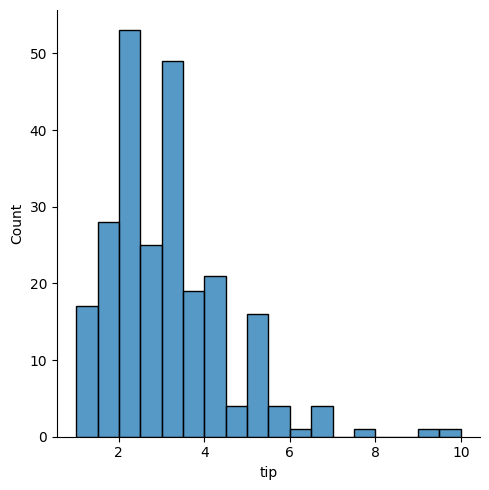

In [4]:
sns.displot(df["tip"])

### 棒グラフ
sns.catplot(x, data, kind="count")

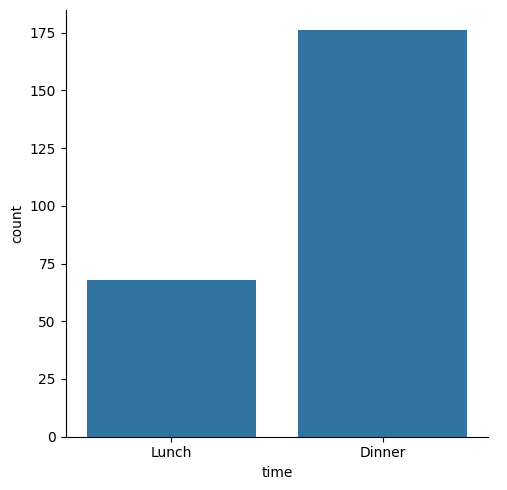

In [5]:
sns.catplot(x="time", data=df, kind="count")

## 代表値
* 平均(mean)
* 中央値(median)
* 最頻値(mode)

### 平均値
* 平均値の特徴
  * **平均からの差(偏差(deviation))の合計は0**
  * **平均値は、各値からの差の2乗の合計(平方和)を最小にする**
* 平均値の算出
  * np.mean()
  * df["column"].mean()
  * df.groupby("column").mean()

In [7]:
# 平均値
np.mean(df["tip_rate"])

0.16080258172250472

In [8]:
df["tip_rate"].mean()

0.16080258172250472

In [16]:
df.groupby("sex").mean(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_549/2199818090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").mean(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_549/3213116755.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="tip_rate", data=df, ci=None)  ## ci: credible interval(信頼区間)


<Axes: xlabel='sex', ylabel='tip_rate'>

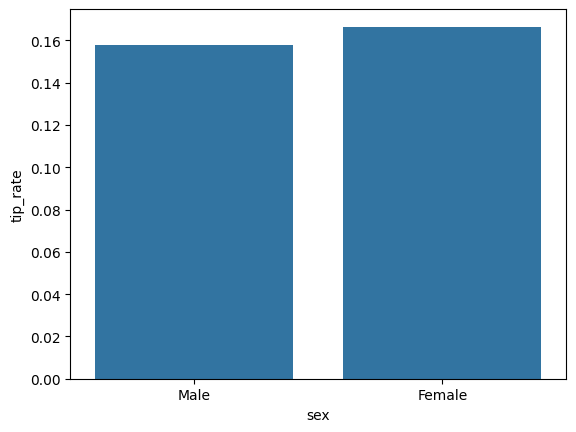

In [18]:
sns.barplot(x="sex", y="tip_rate", data=df, ci=None)  ## ci: credible interval(信頼区間)

### 中央値
* 中央値の特徴
  * 平均値より外れ値の影響を受けにくい
  * 真ん中の値がない場合は、真ん中の2つの中間をとる
  * 平均値の計算より時間がかかることに注意(ソートがあるため)
* 中央値の算出
  * np.median()
  * df["column"].median()
  * df.groupby("column").median(numeric_only=True)

In [3]:
# 中央値
np.median(df["tip_rate"])

0.15476977125802577

In [4]:
df["tip_rate"].median()

0.15476977125802577

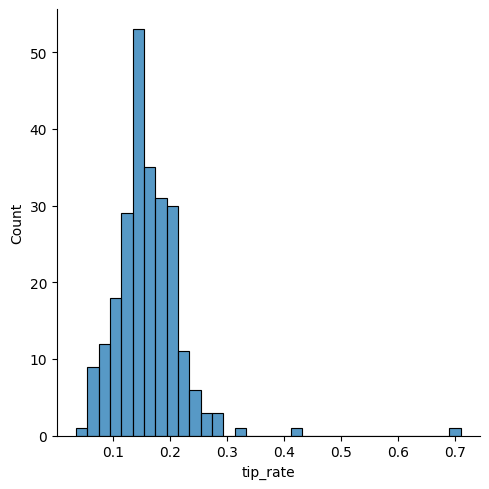

In [5]:
sns.displot(df["tip_rate"])

In [7]:
df.groupby("sex").median(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_14752/2454756599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").median(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_14752/3975821763.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="tip_rate", data=df, estimator=np.median, ci=None)  ## ci: credible interval(信頼区間)


<Axes: xlabel='sex', ylabel='tip_rate'>

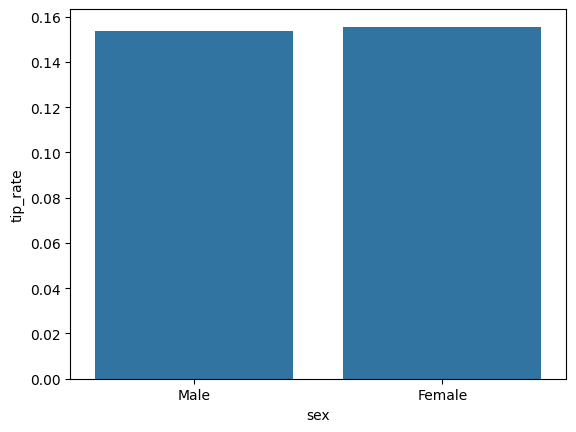

In [6]:
sns.barplot(
    x="sex", y="tip_rate", data=df, estimator=np.median, ci=None
)  ## ci: credible interval(信頼区間)

In [8]:
df.sort_values("tip_rate", ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


### 最頻値
* 最頻値の特徴
  * 極端に特定の値に集中している場合、最頻値を代表値として使う
  * 分布の山をモーダル(modal)と呼ぶ
* 最頻値の算出
  * stats.mode()
  * df["column"].mode()

In [10]:
# 最頻値
stats.mode([1, 2, 2, 2, 3, 4])

ModeResult(mode=2, count=3)

In [11]:
mode, count = stats.mode([1, 2, 2, 2, 3, 4])
print(mode, count)

2 3


In [13]:
df["size"].mode()

0    2
Name: size, dtype: int64

## 散布度
* データのばらつきを表したい
  * 範囲(range)
  * 四分位数(quartile)
  * 平均偏差(MD)
  * 分散(variance)
  * 標準偏差(standard deviation)

### 範囲
* 最大値 - 最小値
* 外れ値に弱い
* 全体のばらつき度を示すには不十分
  * →最小、最大以外のものを使おう

In [14]:
# 範囲
np.min(df["tip"])

1.0

In [15]:
df["tip"].min()

1.0

In [18]:
df.groupby("sex").min(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_14752/3941874566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").min(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


### 四分位数
* 四分位数の特徴
  * データを並べて四分割した時の25%, 50%, 75%の値
  * "範囲"よりは外れ値に強い
    * 全体のばらつき度を示すにはまだ不十分
* 四分位数の算出
  * np.quantile(data, [0.25, 0.5, 0.75])
  * df["column"].quantile([0.25, 0.5, 0.75])

In [21]:
np.quantile(df["tip_rate"], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [20]:
df["tip_rate"].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [22]:
# 四分位範囲(IQR)
stats.iqr(df["tip_rate"])

0.06234812458689151

<Axes: >

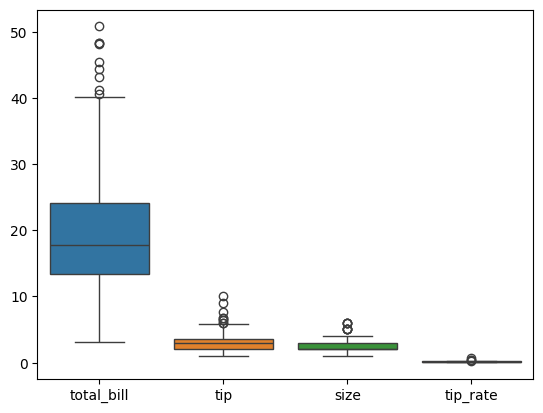

In [23]:
sns.boxplot(df)

<Axes: xlabel='sex', ylabel='tip_rate'>

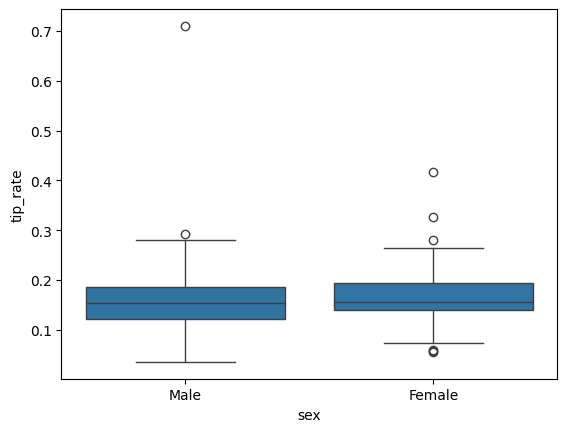

In [25]:
sns.boxplot(x="sex", y="tip_rate", data=df)

## 平均偏差
* 平均偏差の特徴
  * 平均(もしくは中央値)からの偏差の絶対値の平均
  * すべてのデータを使うので、範囲や四分位数より散布度としては適している
  * 絶対値が扱いにくい
    * 絶対値が扱いにくいので2乗する　→　分散を使う

## 分散(variance)
* 分散の特徴
  * 平均からの偏差(各データとの差)の2乗の平均
  * すべてのデータを使うので、範囲や四分位数より散布度としては適している
  * nではなくn-1で割る不偏分散もよく使われる
  * 2乗するため尺度がずれてしまうのが問題　→ 平方根をとる(標準偏差)
* 分散の算出
  * np.var()

In [26]:
np.var(df["tip_rate"])

0.00371452800135469

## 標準偏差(standard deviation)
* 標準偏差の特徴
  * 平均からの偏差(各データとの差)の2乗の平方根　→ 分散の平方根
  * すべてのデータを使うので、範囲や四分位数より散布度としては適している
* 標準偏差の算出
  * np.std()

In [27]:
np.std(df["tip_rate"])

0.060946927743362835

## 2変数間の記述統計

### 共分散

### 正の相関と負の相関

### 相関係数(correlation coefficient)

### 連関(association)

### カイ二乗

### クラメールの連関係数